## Manufacture Order Durable Goods Time Series

In [ ]:
!pip install alpha_vantage
!pip install prophet
!pip install --upgrade statsmodels

In [ ]:
import os 
import numpy as np
import pandas as pd
from datetime import datetime
from alpha_vantage.foreignexchange import ForeignExchange
from pprint import pprint

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## The google drive mounting is for using local library

In [ ]:
# Mount your google drive in google colab
from google.colab import drive
drive.mount('/content/drive')

# Insert the directory to syspath
import sys
sys.path.insert(0, '/content/drive/MyDrive/Colab Notebooks')

Mounted at /content/drive


In [ ]:
from time_series_utils import timeseries_evaluation_metrics_func, timeseries_RMSE_calc, \
                          create_proph_train_test, find_best_Prophet_model, \
                          find_best_ETS_model, find_best_ARIMA_model, find_best_SARIMAX_model

Importing plotly failed. Interactive plots will not work.


## Manufacture new orders of durable goods

In [ ]:
import requests

In [ ]:
api_key = None
try:
  with open('drive/MyDrive/ALPHAVANTAGE_API_KEY.txt') as f:
      api_key = f.readline()
except:
    with open('ALPHAVANTAGE_API_KEY.txt') as f:
      api_key = f.readline()

In [ ]:
url = f"https://www.alphavantage.co/query?function=DURABLES&apikey={api_key}"
r = requests.get(url)

In [ ]:
data = r.json()
print(data)

{'name': 'Manufacturer New Orders: Durable Goods', 'interval': 'monthly', 'unit': 'millions of dollars', 'data': [{'date': '2022-02-01', 'value': '265296'}, {'date': '2022-01-01', 'value': '260087'}, {'date': '2021-12-01', 'value': '281341'}, {'date': '2021-11-01', 'value': '257601'}, {'date': '2021-10-01', 'value': '259457'}, {'date': '2021-09-01', 'value': '271323'}, {'date': '2021-08-01', 'value': '265120'}, {'date': '2021-07-01', 'value': '240387'}, {'date': '2021-06-01', 'value': '276422'}, {'date': '2021-05-01', 'value': '247305'}, {'date': '2021-04-01', 'value': '246489'}, {'date': '2021-03-01', 'value': '279768'}, {'date': '2021-02-01', 'value': '236976'}, {'date': '2021-01-01', 'value': '222873'}, {'date': '2020-12-01', 'value': '242573'}, {'date': '2020-11-01', 'value': '222229'}, {'date': '2020-10-01', 'value': '233711'}, {'date': '2020-09-01', 'value': '236648'}, {'date': '2020-08-01', 'value': '219612'}, {'date': '2020-07-01', 'value': '205655'}, {'date': '2020-06-01', 'va

In [ ]:
df3 = pd.DataFrame(data['data'])
df3.head()

date   value
0  2022-02-01  265296
1  2022-01-01  260087
2  2021-12-01  281341
3  2021-11-01  257601
4  2021-10-01  259457

In [ ]:
df3.dtypes

date     object
value    object
dtype: object

In [ ]:
df3.date = pd.to_datetime(df3.date)
df3.rename(columns={'value': 'Million_dollars'}, inplace=True)
df3['Million_dollars'] = df3['Million_dollars'].astype(int)
df3.dtypes

date               datetime64[ns]
Million_dollars             int32
dtype: object

In [ ]:
df3.tail()

date  Million_dollars
356 1992-06-01           131268
357 1992-05-01           122274
358 1992-04-01           123268
359 1992-03-01           129309
360 1992-02-01           118429

In [ ]:
df3 = df3.set_index('date')
df3.head()

Million_dollars
date                       
2022-02-01           265296
2022-01-01           260087
2021-12-01           281341
2021-11-01           257601
2021-10-01           259457

In [ ]:
df3.index

DatetimeIndex(['2022-02-01', '2022-01-01', '2021-12-01', '2021-11-01',
               '2021-10-01', '2021-09-01', '2021-08-01', '2021-07-01',
               '2021-06-01', '2021-05-01',
               ...
               '1992-11-01', '1992-10-01', '1992-09-01', '1992-08-01',
               '1992-07-01', '1992-06-01', '1992-05-01', '1992-04-01',
               '1992-03-01', '1992-02-01'],
              dtype='datetime64[ns]', name='date', length=361, freq=None)

Time series should be in ascending order. We need to reverse this one.

In [ ]:
df3 = df3[::-1]

In [ ]:
df3.head()

Million_dollars
date                       
1992-02-01           118429
1992-03-01           129309
1992-04-01           123268
1992-05-01           122274
1992-06-01           131268

In [ ]:
df3.index

DatetimeIndex(['1992-02-01', '1992-03-01', '1992-04-01', '1992-05-01',
               '1992-06-01', '1992-07-01', '1992-08-01', '1992-09-01',
               '1992-10-01', '1992-11-01',
               ...
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01'],
              dtype='datetime64[ns]', name='date', length=361, freq=None)

In [ ]:
from datetime import datetime, timedelta
train_dataset_end = datetime(2020,12,1)
test_dataset_end = datetime(2022,2,1)

In [ ]:
train_data = df3[:train_dataset_end]
test_data = df3[train_dataset_end+timedelta(days=30):test_dataset_end]

In [ ]:
test_data

Million_dollars
date                       
2021-01-01           222873
2021-02-01           236976
2021-03-01           279768
2021-04-01           246489
2021-05-01           247305
2021-06-01           276422
2021-07-01           240387
2021-08-01           265120
2021-09-01           271323
2021-10-01           259457
2021-11-01           257601
2021-12-01           281341
2022-01-01           260087
2022-02-01           265296

In [ ]:
df3.Million_dollars.plot(figsize=(16,8))

<AxesSubplot:xlabel='date'>

In [ ]:
# Value Columns to be used in all models tuning
val_col = 'Million_dollars'

In [ ]:
# freq, and date_col for Prophet
ph_freq='MS'
ph_date_col='date'

In [ ]:
import statsmodels.api as sm 
from statsmodels.tsa.seasonal import seasonal_decompose

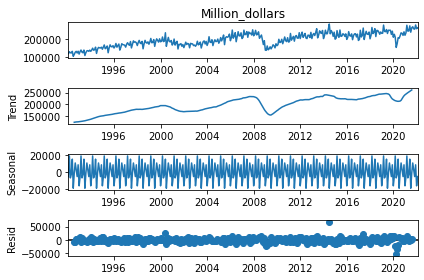

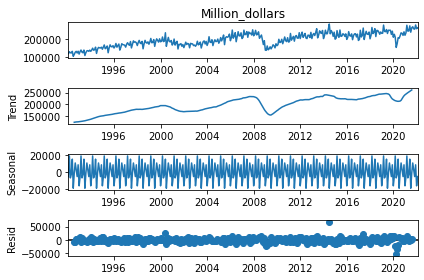

In [ ]:
seasonal_decompose(df3[val_col], model='additive', period=12).plot() # yearly

## Holt Winters Exponential Smoothing (ETS)

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
best_ETS_model, best_RMSE, best_ETS_params = find_best_ETS_model(train_data, test_data,\
                                                                 val_col=val_col, seasonal_periods=[12, 84, 96])

C:\Users\wismi\miniconda3\envs\TorchEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\wismi\miniconda3\envs\TorchEnv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\wismi\miniconda3\envs\TorchEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\wismi\miniconda3\envs\TorchEnv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\wismi\miniconda3\envs\TorchEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will 

In [ ]:
best_RMSE, best_ETS_params

(11073.033740581686, ('mul', 'add', 96))

11073.033740581686, ('mul', 'add', 96)

In [ ]:
test_pred_ETS = best_ETS_model.forecast(len(test_data))
test_pred_ETS

2021-01-01    222269.248801
2021-02-01    237492.565174
2021-03-01    253049.544119
2021-04-01    239783.431610
2021-05-01    245751.439789
2021-06-01    266821.279409
2021-07-01    222250.815874
2021-08-01    252875.528628
2021-09-01    266922.017026
2021-10-01    262698.615194
2021-11-01    266643.700843
2021-12-01    272013.067165
2022-01-01    246485.384139
2022-02-01    265286.146480
Freq: MS, dtype: float64

In [ ]:
test_data['Predicted_ETS'] = test_pred_ETS

<AxesSubplot:xlabel='date'>

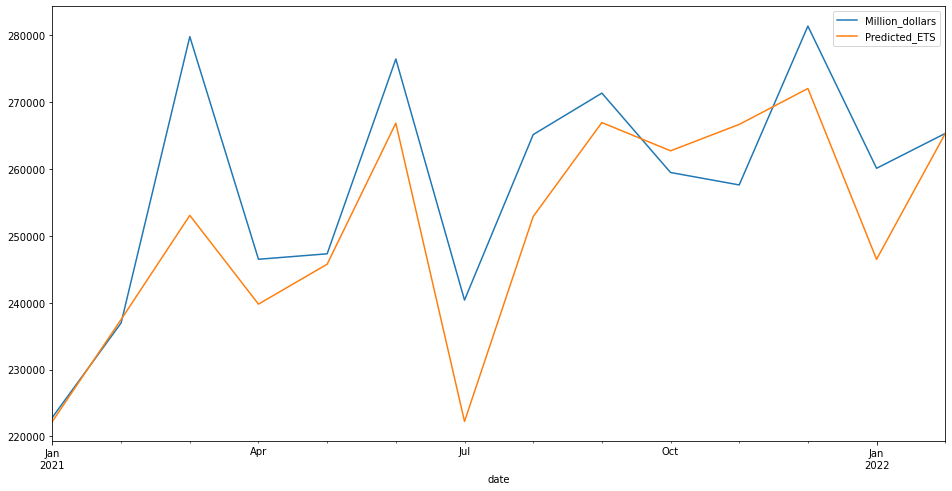

In [ ]:
test_data[[val_col, 'Predicted_ETS']].plot(figsize=(16,8))

## ARIMA Model

In [ ]:
## create an ARIMA model
from statsmodels.tsa.arima.model import ARIMA
best_ARIMA_model, best_RMSE, best_pdq = find_best_ARIMA_model(train_data, test_data, val_col=val_col)

C:\Users\wismi\miniconda3\envs\TorchEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\wismi\miniconda3\envs\TorchEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\wismi\miniconda3\envs\TorchEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\wismi\miniconda3\envs\TorchEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\wismi\miniconda3\envs\TorchEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No fr

In [ ]:
best_pdq, best_RMSE

((0, 1, 6), 16405.7445524835)

best_pdq, best_RMSE = (0, 1, 6), 16405.7445524835

In [ ]:
test_pred_arima = best_ARIMA_model.predict(start=test_data.index[0], end=test_data.index[-1])

In [ ]:
test_data['Predicted_ARIMA'] = test_pred_arima

In [ ]:
test_data[[val_col, 'Predicted_ARIMA']].plot(figsize=(16,8))

<AxesSubplot:xlabel='date'>

## SARIMAX model

In [ ]:
# create a SARIMAX model 
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# we get best pdq from ARIMA (=best_pdq) and seaonal_period from ETS best params
seasonal_period = best_ETS_params[2]

In [ ]:
best_SARIMAX_model, best_RMSE, best_PDQS = find_best_SARIMAX_model(train_data, test_data, best_pdq, \
                                                                  val_col=val_col, season_period=seasonal_period)

C:\Users\wismi\miniconda3\envs\TorchEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\wismi\miniconda3\envs\TorchEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
best_RMSE, best_PDQS

(16405.7445524835, (0, 0, 0, 96))

16405.7445524835, (0, 0, 0, 96)

In [ ]:
pred_test_SARIMAX = best_SARIMAX_model.predict(start=test_data.index[0], end=test_data.index[-1])

In [ ]:
test_data['Predicted_SARIMAX'] = pred_test_SARIMAX

In [ ]:
test_data[[val_col, 'Predicted_SARIMAX']].plot(figsize=(16,8))

<AxesSubplot:xlabel='date'>

## Prophet

In [ ]:
from prophet import Prophet

In [ ]:
proph_train, proph_test = create_proph_train_test(train_data, test_data, date_col=ph_date_col, val_col=val_col)

In [ ]:
best_Prophet_model, best_RMSE, best_Prophet_params = find_best_Prophet_model(
    proph_train, proph_test, test_data, val_col=val_col,freq=ph_freq)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

In [ ]:
best_Prophet_params, best_RMSE

(('linear', 40, 'additive', 5), 22479.7304389855)

('linear', 40, 'additive', 5), 22479.7304389855

In [ ]:
future = best_Prophet_model.make_future_dataframe(periods=len(proph_test), freq=ph_freq)
forecast = best_Prophet_model.predict(future)

In [ ]:
fig1 = best_Prophet_model.plot(forecast)

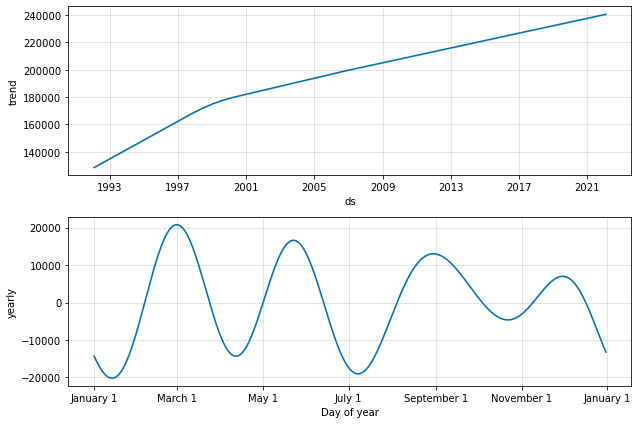

In [ ]:
fig2 = best_Prophet_model.plot_components(forecast)

In [ ]:
test_data['Predicted_Prophet'] = forecast[-(len(proph_test)):][['ds', 'yhat']].set_index('ds')

<AxesSubplot:xlabel='date'>

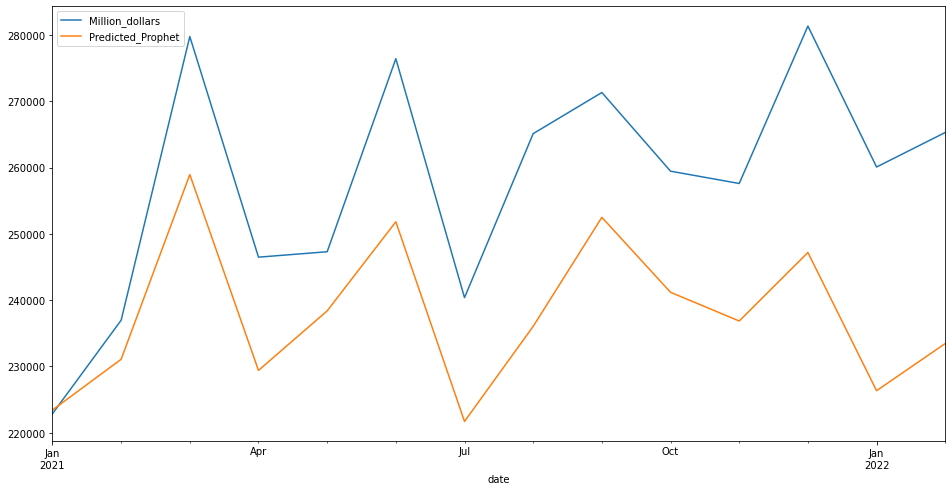

In [ ]:
test_data[[val_col, 'Predicted_Prophet']].plot(figsize=(16,8))

## Metrics

In [ ]:
timeseries_evaluation_metrics_func(test_data.Million_dollars, test_data.Predicted_ETS)

Evaluation metric results:-
Mean Square Error is : 122612076.22006047
Mean Absolute Error is : 8264.569869406198
Root Mean Square Error is : 11073.033740581686
Mean Absolute Percentage Error is : 3.139617136613041
R2 score is : 0.5574632587110719



In [ ]:
timeseries_evaluation_metrics_func(test_data.Million_dollars, test_data.Predicted_ARIMA)

Evaluation metric results:-
Mean Square Error is : 269148454.32134193
Mean Absolute Error is : 12750.840082443872
Root Mean Square Error is : 16405.7445524835
Mean Absolute Percentage Error is : 4.815795053587432
R2 score is : 0.028577905454052033



In [ ]:
timeseries_evaluation_metrics_func(test_data.Million_dollars, test_data.Predicted_SARIMAX)

Evaluation metric results:-
Mean Square Error is : 269148454.32134193
Mean Absolute Error is : 12750.840082443872
Root Mean Square Error is : 16405.7445524835
Mean Absolute Percentage Error is : 4.815795053587432
R2 score is : 0.028577905454052033



In [ ]:
timeseries_evaluation_metrics_func(test_data.Million_dollars, test_data.Predicted_Prophet)

Evaluation metric results:-
Mean Square Error is : 505338280.6094513
Mean Absolute Error is : 20226.61307266605
Root Mean Square Error is : 22479.7304389855
Mean Absolute Percentage Error is : 7.677772092750993
R2 score is : -0.8238885013910924



### Conclusion: 

From the MSE and MAE, ETS model gives the best prediction. 
Order of the models from best to worse: ETS, ARIMA/SARIMAX and finally Prophet. 